## 실습1

In [133]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge, Lasso, ElasticNet

from sklearn.metrics import r2_score

import warnings

from statsmodels.api import qqplot, add_constant

In [134]:
plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [135]:
df_raw = pd.read_csv('../실습파일/2. Big Data 분석/DIABETES.csv', encoding='euc-kr')
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [136]:
df_raw_y = df_raw['Y']
df_raw_x = df_raw.drop('Y', axis=1, inplace=False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=275)
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (309, 10)
train data Y size: (309,)
test data X size: (133, 10)
test data Y size: (133,)


-316.4222971954832


<Axes: >

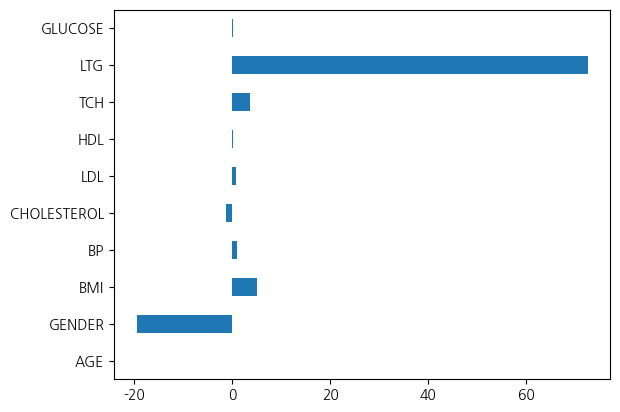

In [137]:
ridge = Ridge(random_state=275, alpha=1)
ridge.fit(df_train_x, df_train_y)

print(ridge.intercept_)

df_ridge_coef = pd.DataFrame({"Coef":ridge.coef_}, index=df_train_x.columns)
df_ridge_coef

df_ridge_coef.plot.barh(y="Coef", legend=False)

규제화 강도를 살펴봤을 때 LTG의 관련성이 가장 높으며 그 이후에는 GENDER가 높은 걸 알 수 있다.

In [138]:
train_pred = ridge.predict(df_train_x)
test_pred = ridge.predict(df_test_x)
print("train data의 결정계수", r2_score(df_train_y, train_pred))
print("test data의 결정계수", r2_score(df_test_y, test_pred))

print("test data의 실제값: \n", df_test_y[:10])
print("test data의 예측값: \n", test_pred[:10])

train data의 결정계수 0.49660330578150935
test data의 결정계수 0.5472392637467303
test data의 실제값: 
 87     134
256    346
59     170
69     178
83     210
335     96
404    293
101    102
6      138
21      49
Name: Y, dtype: int64
test data의 예측값: 
 [151.72580119 257.16545715 136.73337859 119.10476278 150.71180925
  85.25986724 193.58003393 105.44924762  76.7501998   85.14431227]


train data의 결정계수는 0.497, test data의 결정계수는 0.547로 나오는 걸 확인할 수 있다.

-216.8686555646659


<Axes: >

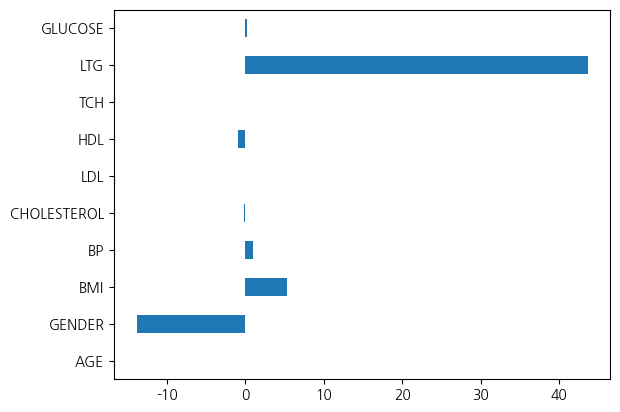

In [139]:
lasso = Lasso(random_state=275, alpha=1)
lasso.fit(df_train_x, df_train_y)

print(lasso.intercept_)

df_lasso_coef = pd.DataFrame({"Coef":lasso.coef_}, index=df_train_x.columns)
df_lasso_coef

df_lasso_coef.plot.barh(y="Coef", legend=False)

Ridge와 마찬가지로 LASSO에서도 LTG, GENDER의 규제화 강도가 큰 걸 확인할 수 있다.

In [140]:
train_pred = lasso.predict(df_train_x)
test_pred = lasso.predict(df_test_x)
print("train data의 결정계수", r2_score(df_train_y, train_pred))
print("test data의 결정계수", r2_score(df_test_y, test_pred))

print("test data의 실제값: \n", df_test_y[:10])
print("test data의 예측값: \n", test_pred[:10])

train data의 결정계수 0.4889225583318634
test data의 결정계수 0.5454690624260004
test data의 실제값: 
 87     134
256    346
59     170
69     178
83     210
335     96
404    293
101    102
6      138
21      49
Name: Y, dtype: int64
test data의 예측값: 
 [146.29677431 250.50119683 138.16084657 119.92471265 146.85946759
  86.48561089 193.22793174 110.22793927  86.76006825  97.09805912]


train data의 결정 계수는 0.489, test data의 결정 계수는 0.545로 나오는 걸 확인할 수 있다.

-100.68810821158169


<Axes: >

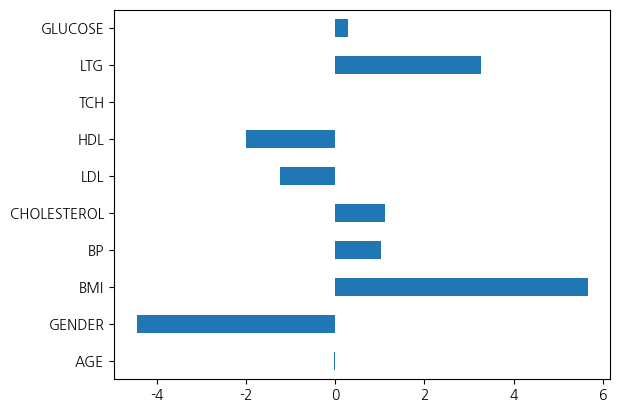

In [141]:
elastic = ElasticNet(random_state=275, alpha=1, l1_ratio = 0.5)
elastic.fit(df_train_x, df_train_y)

print(elastic.intercept_)

df_elastic_coef = pd.DataFrame({"Coef":elastic.coef_}, index=df_train_x.columns)
df_elastic_coef

df_elastic_coef.plot.barh(y="Coef", legend=False)

Elastic 모델은 Lasso와 Ridge가 합쳐진 모델로 이전과는 다르게 BMI의 상관성이 제일 큰 것으로 나타났다. 또한 이어서 GENDER, LTG가 따라오게 되는데 이러한 사실로부터 결합된 모델에서는 기존의 결과와는 꽤나 연관성이 없어 보이는 회귀계수 그래프가 도출될 수 있다는 걸 알 수 있다.

In [142]:
train_pred = elastic.predict(df_train_x)
test_pred = elastic.predict(df_test_x)
print("train data의 결정계수", r2_score(df_train_y, train_pred))
print("test data의 결정계수", r2_score(df_test_y, test_pred))

print("test data의 실제값: \n", df_test_y[:10])
print("test data의 예측값: \n", test_pred[:10])

train data의 결정계수 0.46085802965565636
test data의 결정계수 0.5259387090692469
test data의 실제값: 
 87     134
256    346
59     170
69     178
83     210
335     96
404    293
101    102
6      138
21      49
Name: Y, dtype: int64
test data의 예측값: 
 [137.34027982 242.0811726  138.30340424 120.00677751 139.02007322
  89.06581387 190.67536318 119.17922761 100.07332497 114.95728872]


train data의 결정 계수는 0.461, test data의 결정 계수는 0.526으로 나오는 걸 확인할 수 있다.

## 실습2

In [70]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

In [110]:
df_raw = pd.read_csv('../실습파일/2. Big Data 분석/DIABETES.csv', encoding='euc-kr')
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [111]:
df_raw_y = df_raw['Y']
df_raw_x = df_raw.drop('Y', axis=1, inplace=False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=275)
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (309, 10)
train data Y size: (309,)
test data X size: (133, 10)
test data Y size: (133,)


In [112]:
tree_uncustomize = DecisionTreeRegressor(random_state=275)
tree_uncustomize.fit(df_train_x, df_train_y)
print("Score on training set: {:.3f}".format(tree_uncustomize.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_uncustomize.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.023


In [113]:
tree_uncustomize.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 275,
 'splitter': 'best'}

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.023
1,2,0.958,0.067
2,3,0.890,0.156
3,4,0.816,0.250
4,5,0.766,0.261
5,6,0.726,0.250
6,7,0.701,0.272
7,8,0.669,0.314
8,9,0.639,0.386
9,10,0.624,0.388


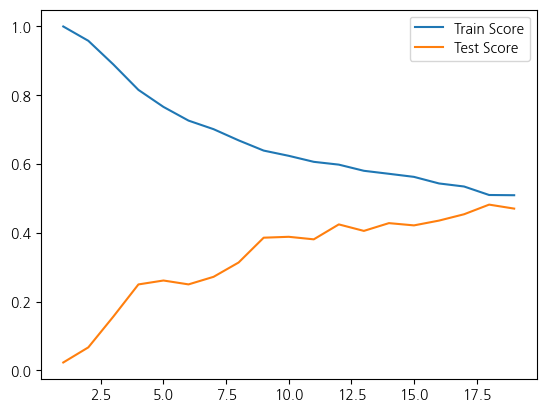

In [114]:
train_score = []; test_score = []
para_leaf = [n_leaf for n_leaf in range(1, 20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=275,
                                 min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

display(df_score_leaf.round(3))

plt.plot(para_leaf, train_score, linestyle='-', label='Train Score')
plt.plot(para_leaf, test_score, linestyle='-', label='Test Score')
plt.legend()

잎사귀 노드 최소 자료 수 증가에 따라 train의 성능은 감소하며 test의 성능은 증가한다 <br>
Train/Test 데이터의 성능 변화를 고려하여 학습 데이터셋의 성능이 높은 10 이상의 값 중 Train Score가 너무 낮아지닌 않는 값인 12를 선택한다. 너무 높은 값을 선정하지 않는 것은 오버피팅의 문제를 방지하기 위함이다.

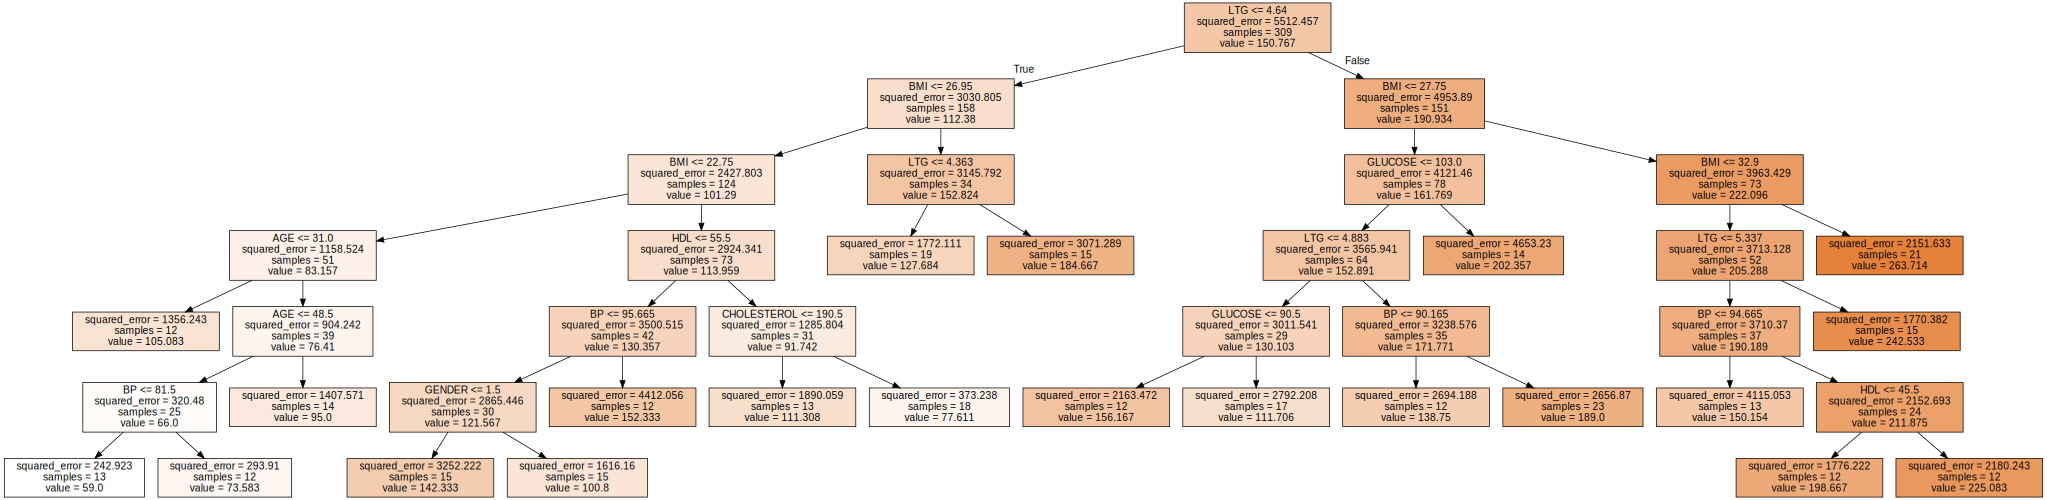

In [123]:
v_feature_name = df_train_x.columns

tree_graph = DecisionTreeRegressor(random_state=275, min_samples_leaf=12)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='tree_leaf.dot',
                feature_names=v_feature_name, impurity=True, filled=True)
with open('tree_leaf.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

,MinSamplesSplit,TrainScore,TestScore
0,2,0.598,0.424
1,4,0.598,0.424
2,6,0.598,0.424
3,8,0.598,0.424
4,10,0.598,0.424
5,12,0.598,0.424
6,14,0.598,0.424
7,16,0.598,0.424
8,18,0.598,0.424
9,20,0.598,0.424


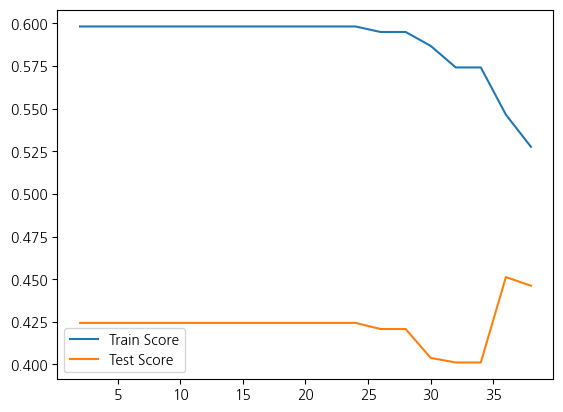

In [124]:
train_score = []; test_score = []
para_split = [n_split*2 for n_split in range(1, 20)]
for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=275, min_samples_leaf=12,
                                 min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
display(df_score_split.round(3))
plt.plot(para_split, train_score, linestyle='-', label='Train Score')
plt.plot(para_split, test_score, linestyle='-', label='Test Score')
plt.legend()

분리 노드의 최소 자료 수 증가에 따라 모델의 설명력은 24를 기준으로 성능이 저하되는 현상을 보인다.<br>
이 값을 36으로 설정하여 test score가 높게 나오는 값을 고르며 이때 train 성능값이 지나치게 떨어지지 않는 것으로 판단했다 <br>

,Depth,TrainScore,TestScore
0,1,0.280,0.299
1,2,0.402,0.479
2,3,0.465,0.480
3,4,0.518,0.454
4,5,0.547,0.451
5,6,0.547,0.451
6,7,0.547,0.451
7,8,0.547,0.451
8,9,0.547,0.451
9,10,0.547,0.451


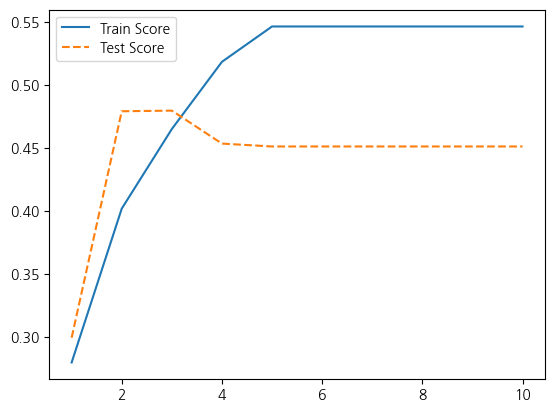

In [125]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=275, min_samples_leaf=12,
                                 min_samples_split=36, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))


df_score_depth  = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

display(df_score_depth.round(3))

plt.plot(para_depth, train_score, linestyle='-', label='Train Score')
plt.plot(para_depth, test_score, linestyle='--', label='Test Score')
plt.legend()

최대 깊이 증가에 따라 모델의 설명력은 증가하며 Test Score가 0부터 4까지의 범위에서 Train Score 보다 성능이 높게 나오는 걸 확인할 수 있었다.<br>
이러한 결과로부터 depth를 3으로 선정했을 때 Test Score가 가장 높고 Train Score도 이전 값 대비 성능이 높아졌으므로 3으로 선정한다

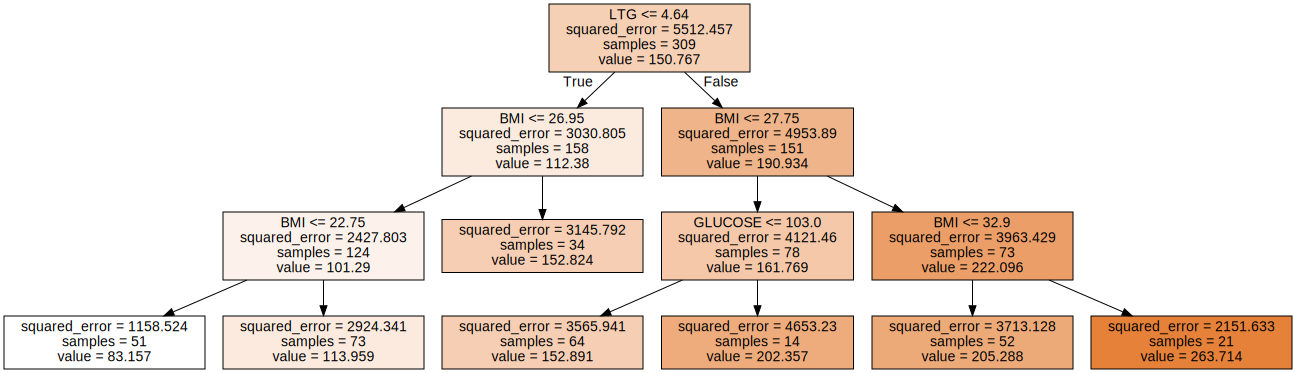

In [126]:
tree_graph = DecisionTreeRegressor(random_state=275, min_samples_leaf=12,
                                 min_samples_split=36, max_depth=3)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='tree_depth.dot',
                feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_depth.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [127]:
v_feature_name = df_train_x.columns
tree_final = DecisionTreeRegressor(random_state=275, min_samples_leaf=12,
                                 min_samples_split=36, max_depth=3)
tree_final.fit(df_train_x, df_train_y) 
tree_final.get_params()

test_pred = tree_final.predict(df_test_x)
print('test data의 실제값: \n', df_test_y[:10])
print('test data의 예측값: \n', test_pred[:10])

test data의 실제값: 
 87     134
256    346
59     170
69     178
83     210
335     96
404    293
101    102
6      138
21      49
Name: Y, dtype: int64
test data의 예측값: 
 [152.890625   263.71428571 152.890625    83.15686275 152.82352941
  83.15686275 152.82352941  83.15686275  83.15686275 113.95890411]


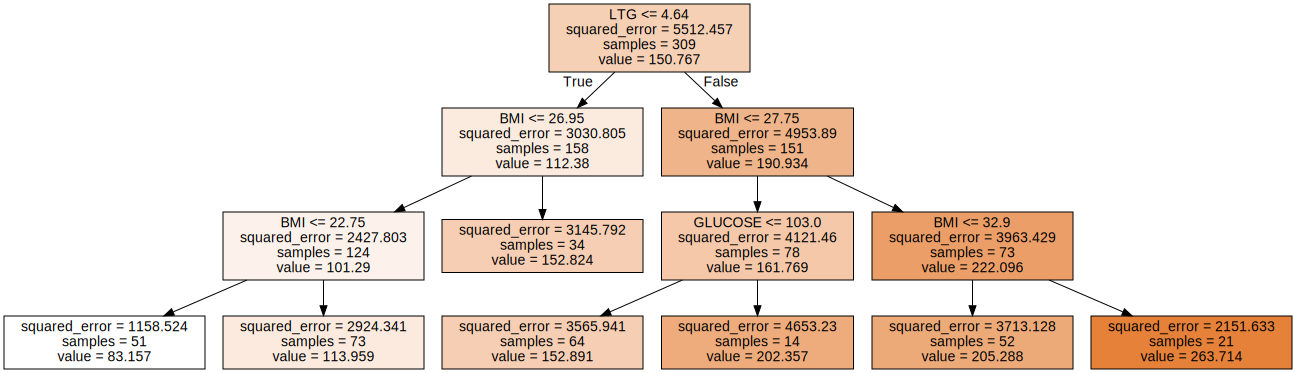

In [128]:
export_graphviz(tree_final, out_file="tree_final.dot",
                feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_final.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

트리 분리에 가장 큰 영향을 주는 변수는 LTG, BMI, GLUCOSE이다. <br>
LTG <= 4.64이면 True하고 4.64 보다 크면 False이다. 다음으로 BMI 지수가 26.95 보다 작으면 True 그것 이상으로 값이 크면 False이다. <br>
또한 BMI가 22.75 보다 더 작으면 가장 왼쪽에 위치하는 것을 확인할 수 있다. <br>
이러한 방식으로 분리 조건의 좌측이 True, 우측이 False가 적용됨을 알 수 있다.<br>
트리구조에서의 분류 예시를 살펴본다.<br>
가장 좌측값의 흐름을 따라가보면 LTG <= 4.64, BMI <= 22.75의 경우 가장 좌측에 위치하게된다.<br>
그 다음 단계에서는 LTG <= 4.64, 22.75 < BMI <= 26.95의 경우가 해당된다.<br>

In [129]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
8,LTG,0.601
2,BMI,0.363
9,GLUCOSE,0.035
0,AGE,0.000
1,GENDER,0.000
3,BP,0.000
4,CHOLESTEROL,0.000
5,LDL,0.000
6,HDL,0.000
7,TCH,0.000


In [145]:
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거
warnings.filterwarnings(action='ignore')
estimator = DecisionTreeRegressor()

param_grid = {"criterion" : ['squeared_error', 'friedman_mse', 'absolute_error'], 'max_features': ['sqrt', 'log2'],
              'max_depth': para_depth, 'min_samples_split': para_split,
              'min_samples_leaf': para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring='r2', n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features='log2', min_samples_leaf=19,
                      min_samples_split=30)

best parameter: 
{'criterion': 'friedman_mse', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 19, 'min_samples_split': 30}

best score: 
0.379


최대 깊이가 5, 잎사귀의 최소 샘플 수가 17일 때 설명력이 36.4%로 나오는 걸 확인할 수 있다.

Text(0, 0.5, '변수')

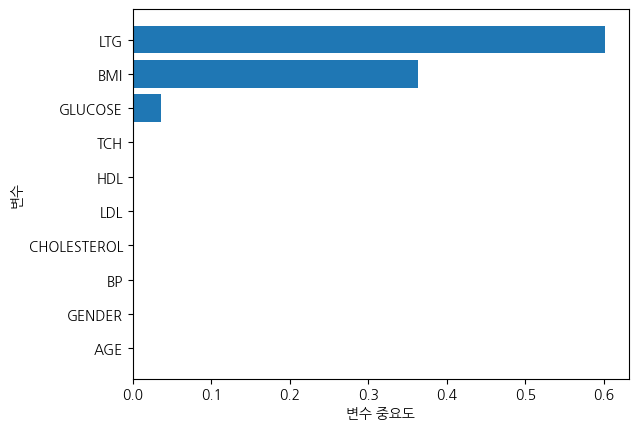

In [132]:
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

LTG, BMI, GLUCOSE 순으로 변수의 영향이 크다고 볼 수 있다. GLUCOSE의 경우 LTG, BMI에 비해 변수 영향도가 크지 않으며 언급한 세가지 변수 이외에도 선택되는 데이터에 따라 다른 변수의 중요도가 변경될 수 있다.

## 실습3 랜덤포레스트

In [ ]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz

import graphviz



from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV


In [50]:
df_raw = pd.read_csv('../실습파일/2. Big Data 분석/DIABETES.csv', encoding='euc-kr')
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [51]:
rf_uncustomized = RandomForestRegressor(random_state=275)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.919
Score on test set: 0.455


모델 설명력이 train은 91.9%, test는 45.5%로 모델은 train 데이터에 과적합되어 모델을 변경할 필요가 있다.

,n_estimators,TrainScore,TestScore
0,10,0.892,0.393
1,20,0.908,0.404
2,30,0.908,0.432
3,40,0.911,0.442
4,50,0.914,0.458
5,60,0.915,0.454
6,70,0.915,0.451
7,80,0.917,0.451
8,90,0.919,0.450
9,100,0.919,0.455


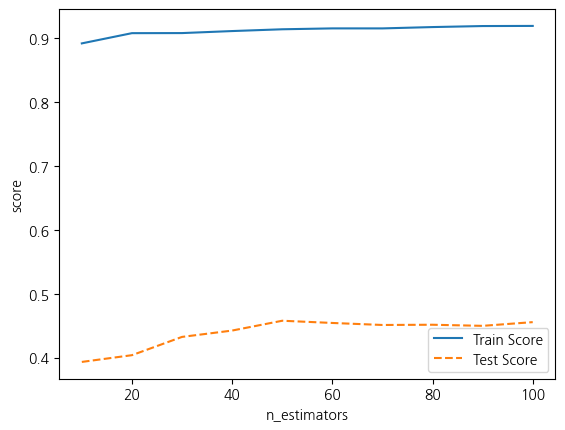

In [59]:
train_score = []; test_score = []
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators=v_n_estimators, random_state=275)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))


df_score_n  = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

display(df_score_n.round(3))
plt.plot(para_n_tree, train_score, linestyle='-', label='Train Score')
plt.plot(para_n_tree, test_score, linestyle='--', label='Test Score')
plt.ylabel('score'); plt.xlabel('n_estimators')
plt.legend()


생성하는 결정 트리 수 증가에 따라 모델의 설명력이 다소 증가한다 <br>
트리 수가 50개 쯤에 test score가 향상하지 않으므로 test socer가 제일 큰 값인 50을 선택한다

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.914,0.458
1,2,0.877,0.466
2,3,0.831,0.467
3,4,0.782,0.465
4,5,0.748,0.460
5,6,0.715,0.460
6,7,0.694,0.466
7,8,0.670,0.467
8,9,0.651,0.474
9,10,0.634,0.469


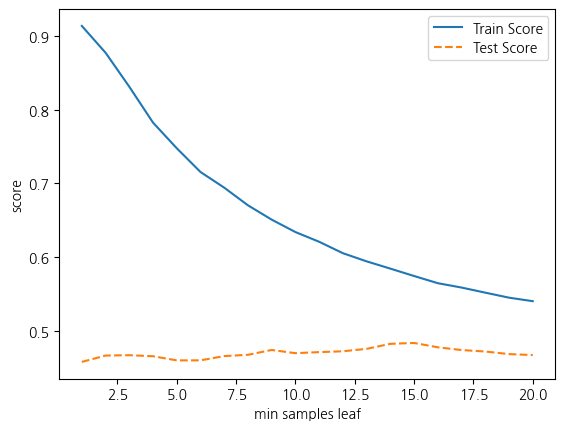

In [58]:
train_score = []; test_score = []
para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=275, n_estimators=50,
                                 min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))


df_score_leaf  = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

display(df_score_leaf.round(3))

plt.plot(para_leaf, train_score, linestyle='-', label="Train Score")
plt.plot(para_leaf, test_score, linestyle='--', label='Test Score')
plt.ylabel('score'); plt.xlabel('min samples leaf')
plt.legend()

앞사귀 노드의 최소 자료 수 증가에 따라 모델의 설명력이 감소한다 <br>
test data에 대한 성능 결과가 leaf의 개수에 따라 큰 변동이 없는 관계로 분리 노드 최소 자료 수를 1로 설정한다. <br>
이에 따라 train score는 0.877, test score는 0.466의 결과가 도출된 파라미터를 채택하게 된다.

,MinSamplesSplit,TrainScore,TestScore
0,4,0.715,0.460
1,6,0.715,0.460
2,8,0.715,0.460
3,10,0.715,0.460
4,12,0.715,0.460
5,14,0.705,0.463
6,16,0.690,0.463
7,18,0.676,0.463
8,20,0.665,0.465
9,22,0.653,0.465


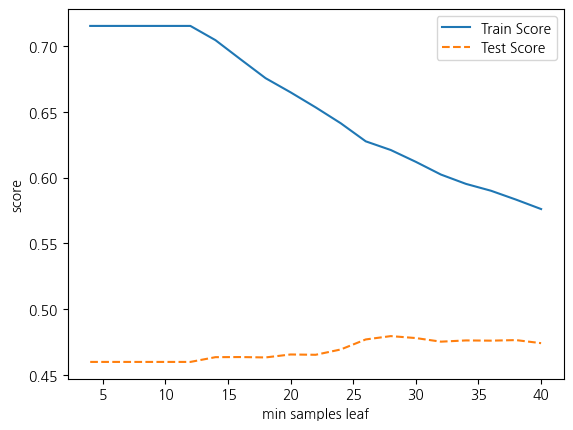

In [61]:
train_score = []; test_score = []
para_split = [n_split*2 for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=275, n_estimators=50, min_samples_leaf=6,
                                 min_samples_split=v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))


df_score_split  = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

display(df_score_split.round(3))

plt.plot(para_split, train_score, linestyle='-', label="Train Score")
plt.plot(para_split, test_score, linestyle='--', label='Test Score')
plt.ylabel('score'); plt.xlabel('min samples leaf')
plt.legend()

분리 노드 최소 자료 수 증가에 따라 모델의 설명력이 감소된다 <br>
분리 노드 최소 자료 수가 14일 때 학습 데이터셋에 대한 성능이 크게 나빠지지 않으면서도 테스트 데이터셋에 대한 성능 결과가 소폭 상승했으므로 분리 노드 최소 자료수는 14로 선정한다<br>

,Depth,TrainScore,TestScore
0,1,0.386,0.399
1,2,0.491,0.471
2,3,0.568,0.482
3,4,0.630,0.479
4,5,0.673,0.474
5,6,0.696,0.464
6,7,0.703,0.463
7,8,0.705,0.463
8,9,0.705,0.463
9,10,0.705,0.463


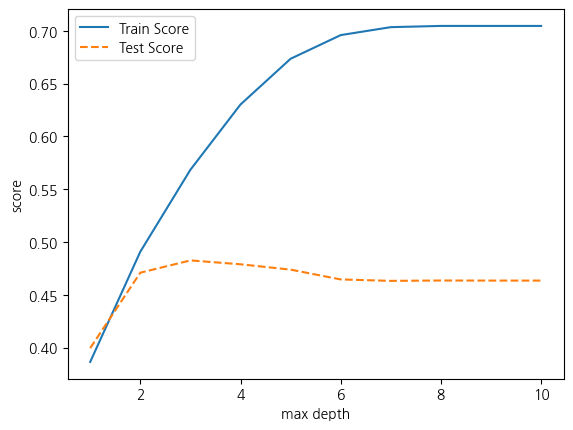

In [65]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=275, n_estimators=50, min_samples_leaf=6,
                                 min_samples_split=14, max_depth=v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))


df_score_depth  = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

display(df_score_depth.round(3))

plt.plot(para_depth, train_score, linestyle='-', label="Train Score")
plt.plot(para_depth, test_score, linestyle='--', label='Test Score')
plt.ylabel('score'); plt.xlabel('max depth')
plt.legend()

최대 깊이 증가에 따라 모델의 설명력은 증가하게 된다 <br>
Train/Test 데이터셋의 성능 모두 증가하는 추세를 보이다 특정 값을 지나면서 성능이 정체하는 현상을 보인다 <br>
이로부터 Test의 정확도를 우선 고려하여 depth가 3,4인 경우를 고려하며 해당 숫자에 대해 확인해봤을 때 train의 성능이 더 높은 경우인 depth는 3으로 선정한다.

In [151]:
rf_final = RandomForestRegressor(random_state=275, n_estimators=50, min_samples_leaf=6,
                                 min_samples_split=14, max_depth=3)
rf_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.559
Score on test set: 0.507


In [152]:
test_pred = rf_final.predict(df_test_x)
print("test data의 실제값: \n", df_test_y[:10])
print("test data의 예측값: \n", test_pred[:10])

rf_final.get_params()

test data의 실제값: 
 87     134
256    346
59     170
69     178
83     210
335     96
404    293
101    102
6      138
21      49
Name: Y, dtype: int64
test data의 예측값: 
 [176.39618844 229.16312242 174.45269904  94.48536136 127.42695482
  86.5658142  153.38762699 101.96781146  91.74242404 105.79441072]


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'min_samples_split': 14,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 275,
 'verbose': 0,
 'warm_start': False}

In [68]:
df_importance = pd.DataFrame()
df_importance['Feature'] = df_train_x.columns
df_importance['Importance'] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
2,BMI,0.444
8,LTG,0.353
9,GLUCOSE,0.062
3,BP,0.062
6,HDL,0.035
7,TCH,0.018
5,LDL,0.011
4,CHOLESTEROL,0.007
0,AGE,0.007
1,GENDER,0.001


Text(0, 0.5, '변수')

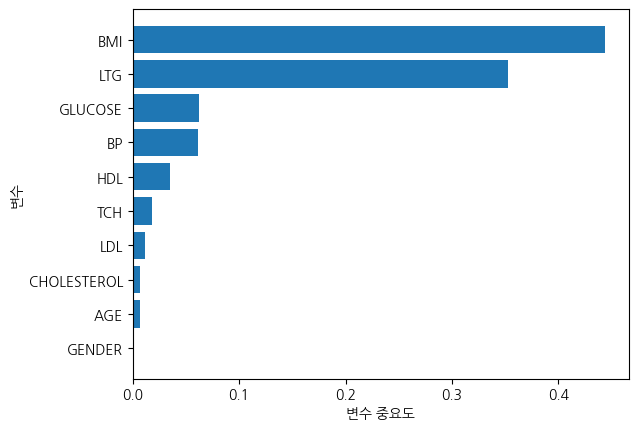

In [69]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel('변수')

중요도가 높은 변수들을 차례로 나열하였다. BMI 지수, LTG, GLUCOSE, BP 순으로 영향이 크다고 해석할 수 있고 그 중 BML, LTG의 영향이 가장 크다고 할 수 있다. 랜덤 포레스트의 트리 구조는 전체를 다 그릴 수 없다는 판단 하에 생략하였다.

## 실습4 그래디언트 부스팅

In [146]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz

from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [147]:
df_raw = pd.read_csv('../실습파일/2. Big Data 분석/DIABETES.csv', encoding='euc-kr')
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [148]:
# 모델 생성 - 기본 옵션으로 생성
gb_uncustomized = GradientBoostingRegressor(random_state=275)
gb_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.852
Score on test set: 0.472


모델 설명력이 train 86.5%, test 45.1%로 과적합 가능성이 있으므로 검증하여 모델 구조를 변화시킨다.

In [149]:
# 현재 생성된 트리 모델 옵션 확인
gb_uncustomized.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 275,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

모델 생성 - n_estimators: 트리 수 변경에 따른 모델 성능

In [32]:
# train 및 test 설명력 결과 저장장장
train_score = []; test_score = []
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state=275, n_estimators=v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))


df_score_n  = pd.DataFrame()
df_score_n['Estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

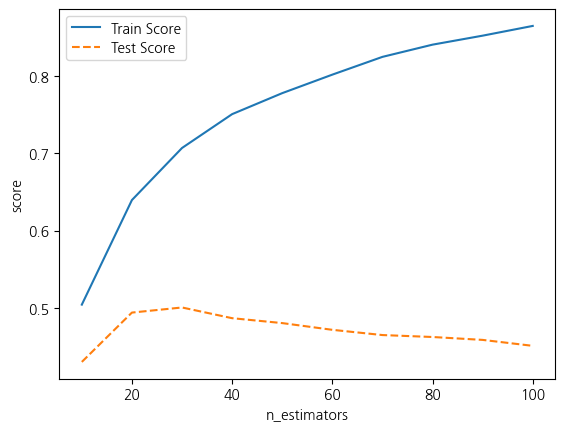

In [33]:
df_score_n.round(3)

plt.plot(para_n_tree, train_score, linestyle='-', label='Train Score')
plt.plot(para_n_tree, test_score, linestyle='--', label='Test Score')
plt.ylabel('score'); plt.xlabel('n_estimators')
plt.legend()

트리 수 증가에 다라 모델의 설명력 지속적으로 향상하나 Test data의 성능 변화 고려해 30을 선택한다

In [34]:
train_score = []; test_score = []
para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state=275, n_estimators=30, min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))


df_score_leaf  = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

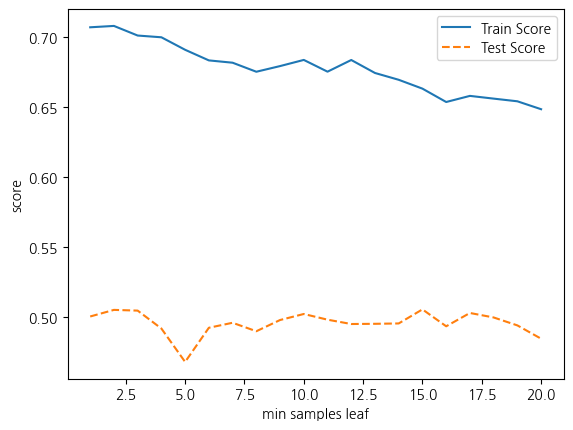

In [35]:
df_score_leaf.round(3)

plt.plot(para_leaf, train_score, linestyle='-', label='Train Score')
plt.plot(para_leaf, test_score, linestyle='--', label='Test Score')
plt.ylabel('score'); plt.xlabel('min samples leaf')
plt.legend()

잎사귀 노드의 최소 자료 수 증가에 따라 모델의 설명력은 감소되며 test 데이터의 성능 변화를 고려하여 15 선택

In [37]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(1, 21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=275, n_estimators=30, min_samples_leaf=15,
                                   min_samples_split=v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))


df_score_split  = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

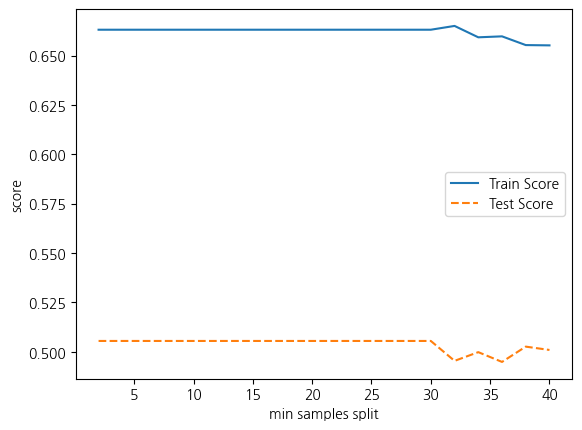

In [38]:
df_score_split.round(3)
plt.plot(para_split, train_score, linestyle='-', label='Train Score')
plt.plot(para_split, test_score, linestyle='--', label='Test Score')
plt.ylabel('score'); plt.xlabel('min samples split')
plt.legend()

분리 노드 최소 자료 수 증가에 따라 모델의 설명력 감소 <br>
Train/Test 데이터의 성능 변화 고려해 30 선택 <br>
30보다 적은 영역에서는 변화없음

In [39]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=275, n_estimators=30,
                                 min_samples_leaf=15, min_samples_split=30,  max_depth=v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))


df_score_depth  = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

In [41]:
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.486,0.495
1,2,0.579,0.512
2,3,0.663,0.505
3,4,0.729,0.478
4,5,0.770,0.468
5,6,0.790,0.454
6,7,0.803,0.461
7,8,0.806,0.476
8,9,0.809,0.472
9,10,0.811,0.475


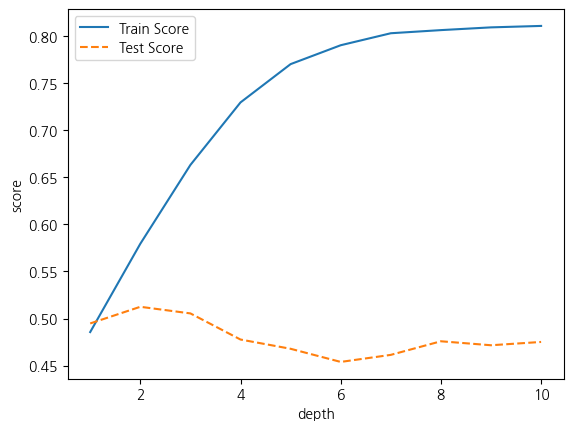

In [40]:

plt.plot(para_depth, train_score, linestyle='-', label="Train Score")
plt.plot(para_depth, test_score, linestyle='--', label='Test Score')
plt.ylabel('score'); plt.xlabel('depth')
plt.legend()

최대 깊이 증가에 따라 모델의 설명력이 증가하지 않는다. <br>
이때 test 데이터의 성능 변화 고려해 depth는 2를 선택한다.

In [42]:
train_score = []; test_score = []
para_lr = [lr*0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=275, n_estimators=30,
                                 min_samples_leaf=15, min_samples_split=30, max_depth=2, learning_rate=v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))


df_score_lr  = pd.DataFrame()
df_score_lr['LearningRate'] = para_lr
df_score_lr['TrainScore'] = train_score
df_score_lr['TestScore'] = test_score

In [43]:
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.579,0.512
1,0.2,0.652,0.511
2,0.3,0.694,0.493
3,0.4,0.726,0.458
4,0.5,0.744,0.435
5,0.6,0.759,0.390
6,0.7,0.796,0.315
7,0.8,0.781,0.344
8,0.9,0.804,0.233


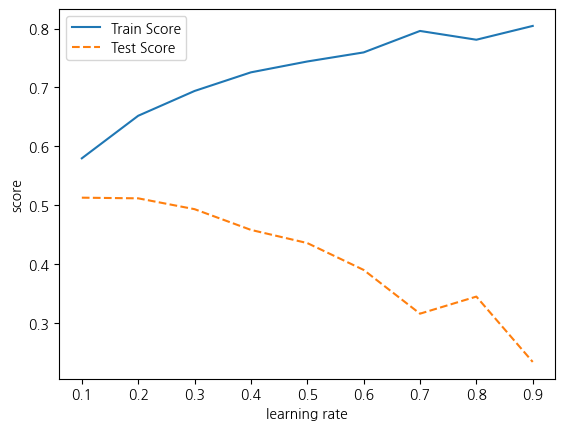

In [44]:

plt.plot(para_lr, train_score, linestyle='-', label="Train Score")
plt.plot(para_lr, test_score, linestyle='--', label='Test Score')
plt.ylabel('score'); plt.xlabel('learning rate')
plt.legend()

학습률이 0.1에서 0.1 단위로 증가할수록 모델의 설명력 증가하지만 test 데이터의 성능이 떨어지게 된다. <br>
따라서 좀 더 작은 숫자와 단위에서의 모델 검증이 필요하다고 여겨진다.

In [45]:
train_score = []; test_score = []
para_lr = [lr*0.02 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=275, n_estimators=30,
                                 min_samples_leaf=15, min_samples_split=30, max_depth=2, learning_rate=v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))


df_score_lr  = pd.DataFrame()
df_score_lr['LearningRate'] = para_lr
df_score_lr['TrainScore'] = train_score
df_score_lr['TestScore'] = test_score

df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.02,0.322,0.319
1,0.04,0.454,0.438
2,0.06,0.519,0.488
3,0.08,0.555,0.504
4,0.10,0.579,0.512
5,0.12,0.598,0.514
6,0.14,0.612,0.514
7,0.16,0.631,0.511
8,0.18,0.649,0.496


test 데이터의 성능을 좀 더 정밀하게 확인해본 결과 learning rate가 0.14일 때 TrainScore와 TestScore가 가장 높은 값으로 검출된다. <br>
이로부터 적합한 learning rate 값은 0.14로 선정한다.

In [46]:
gb_final = GradientBoostingRegressor(random_state=275, n_estimators=30,
                                 min_samples_leaf=15, min_samples_split=30, max_depth=2, learning_rate=0.14)
gb_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.612
Score on test set: 0.514


In [47]:
test_pred = gb_final.predict(df_test_x)
print("test data의 실제값: \n", df_test_y[:10])
print("test data의 예측값: \n", test_pred[:10])

test data의 실제값: 
 353    109
29     283
173    101
131    158
387    201
92      48
40     100
261    103
64      71
74      85
Name: Y, dtype: int64
test data의 예측값: 
 [163.23908895 182.84017606 117.45557064  94.47695427 122.8401087
 161.64065837 156.71519372 120.99074644 120.80897056 146.44568479]


앞선 과정을 통해 모델에 적합한 파라미터들을 선정한다.

,Feature,Importance
2,BMI,0.425
8,LTG,0.336
3,BP,0.074
9,GLUCOSE,0.059
6,HDL,0.052
1,GENDER,0.019
5,LDL,0.016
0,AGE,0.010
7,TCH,0.005
4,CHOLESTEROL,0.004


Text(0, 0.5, '변수')

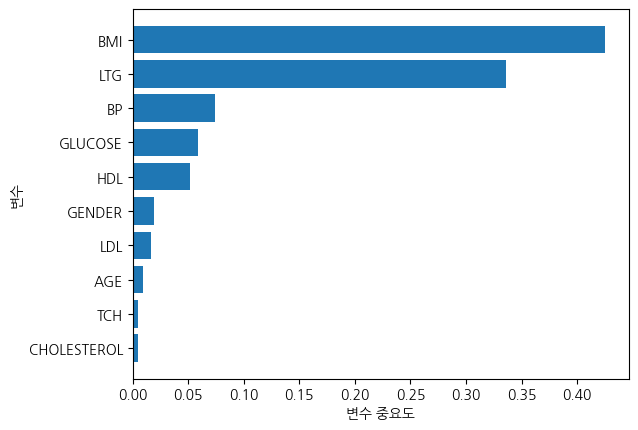

In [49]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
display(df_importance.round(3))
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel('변수')



중요도가 높은 변수들을 차례로 나열하였다. BMI 지수, LTG, BP(혈압) 순으로 영향이 크다고 해석할 수 있고 그 중 BML, LTG의 영향이 가장 크다고 할 수 있다.

## 실습5 모델평가

In [153]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [163]:
df_raw = pd.read_csv('../실습파일/2. Big Data 분석/DIABETES.csv', encoding='euc-kr')
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [164]:
df_raw_y = df_raw['Y']
df_raw_x = df_raw.drop('Y', axis=1, inplace=False)


df_train, df_test = train_test_split(df_raw, test_size=0.3, random_state=275)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=275)

print("train data size for regression: {}".format(df_train.shape))
print("test data size for regression: {}".format(df_test.shape))
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data size for regression: (309, 11)
test data size for regression: (133, 11)
train data X size: (309, 10)
train data Y size: (309,)
test data X size: (133, 10)
test data Y size: (133,)


In [165]:
lr_model = smf.ols(formula="Y ~  GENDER + BMI + BP + CHOLESTEROL + LDL + LTG", data=df_train)
lr_result = lr_model.fit()
print(lr_result.summary())

dt_model = DecisionTreeRegressor(random_state=275, min_samples_leaf=12, min_samples_split=36, max_depth=3)
dt_model.fit(df_train_x, df_train_y)

rf_model = RandomForestRegressor(random_state=275, n_estimators=50, min_samples_leaf=6, min_samples_split=14,
                                 max_depth=3)
rf_model.fit(df_train_x, df_train_y)

gb_model = GradientBoostingRegressor(random_state=275, n_estimators=30, min_samples_leaf=15, min_samples_split=30,
                                 max_depth=2, learning_rate=0.14)
gb_model.fit(df_train_x, df_train_y)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     49.56
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           3.26e-42
Time:                        00:48:39   Log-Likelihood:                -1663.5
No. Observations:                 309   AIC:                             3341.
Df Residuals:                     302   BIC:                             3367.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -305.0391     30.083    -10.140      

GradientBoostingRegressor(learning_rate=0.14, max_depth=2, min_samples_leaf=15,
                          min_samples_split=30, n_estimators=30,
                          random_state=275)

In [166]:
models = ['회귀분석', '의사결정나무', '랜덤 포레스트', '그래디언트 부스팅']

mse, rmse, mae, mape = [], [], [], []


In [167]:
lr_y_pred = lr_result.predict(df_test)

mse.append(mean_squared_error(df_test['Y'], lr_y_pred))
rmse.append(mean_squared_error(df_test['Y'], lr_y_pred, squared=False))
mae.append(mean_absolute_error(df_test['Y'], lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test['Y'], lr_y_pred))

In [168]:
dt_y_pred = dt_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(mean_squared_error(df_test_y, dt_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

In [169]:
rf_y_pred = rf_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(mean_squared_error(df_test_y, rf_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [170]:
gb_y_pred = gb_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(mean_squared_error(df_test_y, gb_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

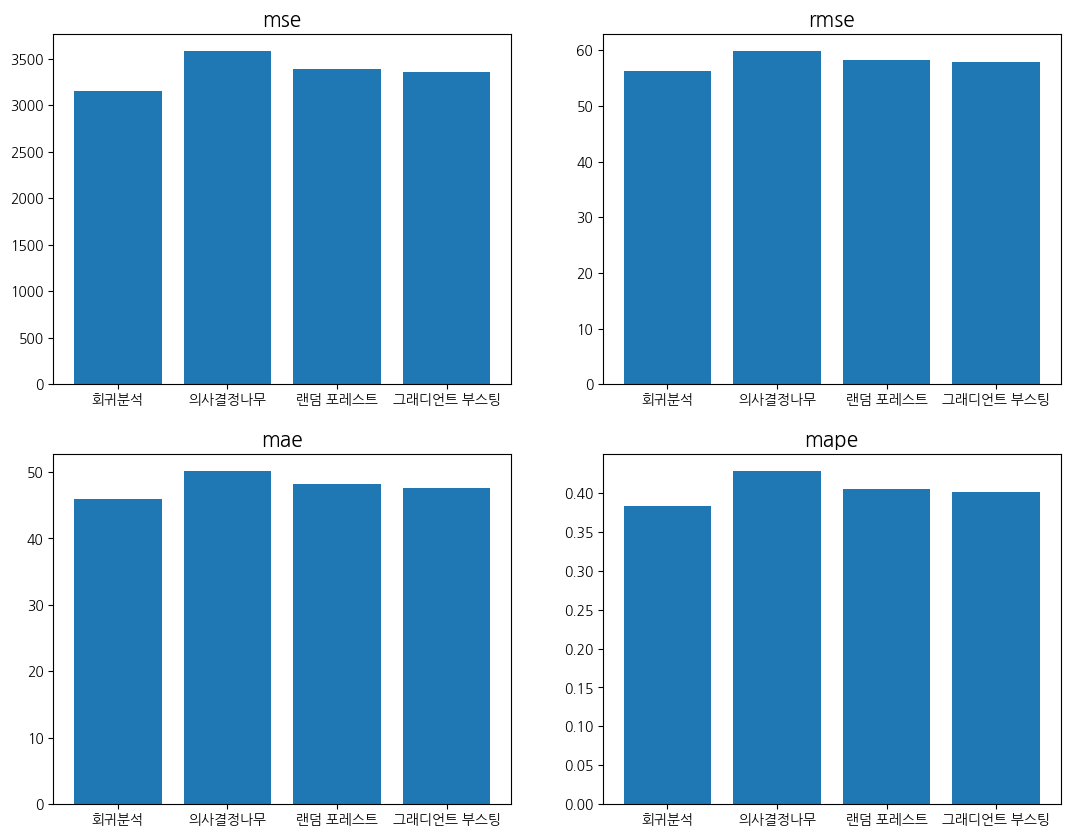

In [171]:
fig, ax = plt.subplots(2, 2, figsize=(13,10))
ax[0,0].bar(models, mse)
ax[0,0].set_title('mse').set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title('rmse').set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title('mae').set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title('mape').set_fontsize(15)

#### 결론
앞선 다중선형회귀분석, 의사결정나무, 랜덤 포레스트, 그래디언트 부스팅의 최적 파라미터를 모델에 적용한 결과는 다음과 같다. <br>
회귀분석의 정확도가 4가지의 경우에서 모두 error값이 가장 낮으므로 성능이 가장 높은 걸 알 수 있다.<br>
반면에 의사결정나무 모델의 성능이 가장 미흡한 걸 확인할 수 있으며 각 error 수치 별로 순위가 비슷하게 나타나는 걸 확인할 수 있다. <br>
가장 결과가 좋았던 회귀분석 모델의 경우에도 accuracy를 확인하지는 못했지만 성능이 좋지 않으므로 현업에서는 쓰이기 힘들다고 판단된다.